# How can Bayes' Theorem predict football games?

In this tutorial we will be showing examples of Bayesian thinking applied to the game of football. Each example will become a little more complex, building to using actual data from bookmakers' odds to build a prediction of the outcome of any given game. We also show how in some instances, one could arrive at the same result through direct estimation from the data, showing the equivalence of Bayesian and frequentist approaches to probability given complete information. However, Bayes' Theorem is an incredibly useful way of estimating conditional probabilities when it is not possible to do so directly, so is a powerful tool to master.

## [Bayes' Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem)

The [Wikipedia page on Bayes' Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) describes it as follows:

In probability theory and statistics, Bayes’ theorem (alternatively Bayes’ law or Bayes' rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. 

One of the many applications of Bayes' theorem is Bayesian inference, a particular approach to statistical inference. When applied, the probabilities involved in Bayes' theorem may have different probability interpretations. With the Bayesian probability interpretation the theorem expresses how a subjective degree of belief should rationally change to account for availability of related evidence. Bayesian inference is fundamental to Bayesian statistics.

Bayes’ theorem is named after [Reverend Thomas Bayes](https://en.wikipedia.org/wiki/Thomas_Bayes) (1701–1761), who first provided an equation that allows new evidence to update beliefs in his An Essay towards solving a Problem in the Doctrine of Chances (1763). It was further developed by Pierre-Simon Laplace, who first published the modern formulation in his 1812 "Théorie analytique des probabilités". Sir Harold Jeffreys put Bayes’ algorithm and Laplace's formulation on an axiomatic basis. Jeffreys wrote that Bayes' theorem "is to the theory of probability what the Pythagorean theorem is to geometry".

![Thomas Bayes](https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif)

Here is his, seemingly simple, formula again:

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$

or, again, with a slightly more intuitive breakdown:

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|A')P(A')}$$

where $A'$ is "not A", the event of A not occurring. Note how the denomiator, the probability of B occurring, $P(B)$, breaks down logically into the sum of the probability of B occurring given that A occurs multiplied by the probability of A occurring, and the probability of B occurring given that A does not occur multiplied by the probability of A not occurring.

The following main concepts are covered in this notebook: 

- Examples illustrating the practical use of Bayes' Theorem.
- Connecting in to an SQL database, query the relevant tables/fields.
- Example of utilizing Bayes with the FIFA database.

## The Monty Hall problem

A classic example in which Bayes' Theorem can be used to guide us to the correct strategy is the [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem). Imagine that you are taking part in a TV game show; there are three doors, two of which conceal a goat and the other a car. You are asked to guess which door hides the car. After you guess, however, the host opens one of the other doors to reveal a goat, and you are then faced with the choice to either stick with your original pick or to switch to the other unrevealed door. What is the correct strategy?

Our intuition is not a perfect guide to this kind of problem, so let's apply Bayes. Let's say you picked door 3, and Monty Hall opens door 1 to reveal a goat. Should you stick with 3, or switch to 2?

Let $X_A$ be the event of the car being behind door $A$ and $Y_Z$ be the event of Monty opening door $Z$. The prior probabilities $P(X_1) = P(X_2) = P(X_3) = \frac{1}{3}$. What we're interested in is $P(X_2|Y_1)$ and $P(X_3|Y_1)$ (clearly $P(X_1|Y_1) = 0$, since the door-opening reveals that there is a goat behind door 1. Applying Bayes' Theorem and starting with our current choice:

$$P(X_3|Y_1) = \frac{P(Y_1|X_3)P(X_3)}{P(Y_1|X_1)P(X_1)+P(Y_1|X_2)P(X_2)+P(Y_1|X_3)P(X_3)} = \frac{0.5(1/3)}{0+1(1/3)+0.5(1/3)} = \frac{1}{3}.$$

The key to understanding this is to recognise that if the car is behind door 2 and we've chosen door 3, Monty must open door 1; it's his only option to reveal a goat. So $P(Y_1|X_2) = 1$ in this case. By definition, since $X_1, X_2$ and $X_3$ are the only possible outcomes, and since $P(X_1|Y_1) = 0$ and $P(X_3|Y_1) = \frac{1}{3}$, then $P(X_2|Y_1)$ must be equal to $\frac{2}{3}$. Or you could go ahead and calculate that by Bayes directly (go and do this as an exercise).

It is clear that Bayes' Theorem would advise us to double our chances of winning by switching our choice from door 3 to door 2.

##  Example 1: Rain-affected matches

Suppose, out of all the 24 matches between Kaizer Chiefs and Orlando Pirates, Chiefs won 16 times while Pirates managed only to win only 8. So, if you were to bet on the winner of the next match between these two sides, which team would it be?

I bet you would say Kaizer Chiefs, and if you had no other information to guide your decision and believed that past experience was representative of the true underlying probability, you would say that this is likely to occur with probability two-thirds.

Now here is a twist: What if you are told that it rained five times when Chiefs won and five times when Pirates won? Suppose I also told you that it will rain on their next match. 

So, who would you bet your money on now? 

By intuition, it is easy to see that chances of winning for Pirates have increased. But the question is: by how much?  Let's use Bayes' Theorem to figure it out!
* Let A be the event of "match played in rain"
* Let B be the event of "Pirates winning"


In [1]:
P_A = 10/24                               # chance of rain - it rained 10 times out of 24 matches.
P_B = 8/24                               # chance of Pirates winning (prior)
P_A_given_B = 5/8                       # chance of rain given Pirates winning
P_B_given_A = (P_A_given_B*P_B) / P_A   # posterior - chances of Pirates wining (given rain) 
print('Chances of Orlando Pirates winning (given rain): {:0.3f}'.format(P_B_given_A))

Chances of Orlando Pirates winning (given rain): 0.500


So the chances of Pirates winning have increased from 20% to 50% with this new piece of information!

We could of course have got here directly by noting that Pirates win 50% (one out of two) of matches played in rain.

## Example 2: Home and away matches
We can apply Bayes' Theorem  by splitting the stats for games played home/away:
* as above, out of all the matches between Chiefs and Pirates, Chiefs have won 16 while Pirates have won 8 times.
* you are told that during Chiefs' home games they won 8 games and Pirates won 3 games. 

Can you predict the probability of Pirates winning given it is a home game for them?


#### Priors 
* P(A) = Probability of a game being a Pirates home game = (n home games)/(n games) = (24 - 11)/(16 + 8) = 13 / 24
* P(B) = Probability of Pirates winning (out of all matches)  = (N_wins/N_games) = 8/(16+8) = 8 / 24
* P(A|B) = Given Pirates won, what is the probability of a game being a home game ?  =(n_win_home/N_win) =(8-3) / (24 - 11) = 5 / 13


#### Posterior

we would like to calculate the probability of Pirates winning during a home game
* P(B|A) = posterior (prediction) 
* P(B|A) = P(A|B) * P(B) / P(A)   

#### Let's plug in the numbers



In [83]:
P_A =  13.0/24.0                                           # pirates are at home
P_B =  8.0/24.0                                            # pirates win
P_A_B = 5.0/8.0                                            # pirates are at home given they win
P_B_A = P_A_B*P_B/P_A                                      # pirates win given they are at homw
print('Probability for Pirates winning: {:0.2f}'.format(P_B))
print('Probability for Pirates winning at home: {:0.2f}'.format(P_B_A))

Probability for Pirates winning: 0.33
Probability for Pirates winning at home: 0.38


Again, this new piece of information changed our beliefs on the outcome of the game in Pirates' favour. And again, we could have got there directly by noting that Pirates won 5 of their 13 home games.

## Example 3: Home and away matches - FOR REAL

Let's try the same problem with (team1,team2) using the [European Soccer Database](https://www.kaggle.com/sashchernuh/european-football/data) hosted on Kaggle.

Steps required:
* connect to SQL DB;
* query the match history table;
* get all matches between team1 and team2, collect win/loss home/away info; and
* calculate probabilities for win/loss at home and away using Bayes' Theorem.



In [84]:
!pip install psycopg2

In [85]:
# import libraries
from sqlalchemy import create_engine
import psycopg2
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [86]:
#connect to the sql dataset on AWS 
db_settings = {'host' : 'edsasoccerinstance.cnzbp4ndrpos.eu-west-1.rds.amazonaws.com', 'dbname' : 'edsaLeagueSoccerDatabase', 'user' : 'edsaSoccer', 'password' : 'edsaSoccer'} 
conn_string = ' '.join(["{}='{}'".format(k, v) for k, v in db_settings.items()]) 
print (conn_string)
conn_rds = psycopg2.connect(conn_string) 
print('Created connection')

teams = pd.read_sql_query("select * from team", con=conn_rds) 
matches = pd.read_sql_query("select * from match", con=conn_rds) 

print('Size of match data retrieved: {}'.format(matches.shape))
print('Size of team data retrieved: {}'.format(teams.shape))

host='edsasoccerinstance.cnzbp4ndrpos.eu-west-1.rds.amazonaws.com' dbname='edsaLeagueSoccerDatabase' user='edsaSoccer' password='edsaSoccer'
Created connection
Size of match data retrieved: (25979, 115)
Size of team data retrieved: (299, 5)


In [87]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [88]:
matches.set_index('id', inplace=True)
teams.set_index('team_api_id', inplace=True)

In [89]:
matches.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=114)

In [90]:
teams.head()

,id,team_fifa_api_id,team_long_name,team_short_name
team_api_id,,,,
9987,1,673.0,KRC Genk,GEN
9993,2,675.0,Beerschot AC,BAC
10000,3,15005.0,SV Zulte-Waregem,ZUL
9994,4,2007.0,Sporting Lokeren,LOK
9984,5,1750.0,KSV Cercle Brugge,CEB


In [91]:
# join the 2 datasets to work with the more familiar team names
df = matches.join(teams['team_long_name'], on='home_team_api_id', rsuffix='_home')
df = df.join(teams['team_long_name'], on='away_team_api_id', rsuffix='_away')
df.rename(columns={'team_long_name': 'hometeam', 'team_long_name_away' : 'awayteam',
                   'home_team_goal': 'fthg', 'away_team_goal': 'ftag'}, inplace=True)

In [92]:
# select only the data we will need
cols = ['league_id',
        'hometeam', 
        'awayteam', 
        'fthg',            # full time home goals
        'ftag',            # full time away goals
        'B365H', 'B365D', 'B365A']  # for use later

In [93]:
df0 = df[cols]

In [94]:
df0.head()

,league_id,hometeam,awayteam,fthg,ftag,B365H,B365D,B365A
id,,,,,,,,
1,1,KRC Genk,Beerschot AC,1,1,1.73,3.40,5.00
2,1,SV Zulte-Waregem,Sporting Lokeren,0,0,1.95,3.20,3.60
3,1,KSV Cercle Brugge,RSC Anderlecht,0,3,2.38,3.30,2.75
4,1,KAA Gent,RAEC Mons,5,0,1.44,3.75,7.50
5,1,FCV Dender EH,Standard de Liège,1,3,5.00,3.50,1.65


In [95]:
df0['home_win'] = (df0['fthg'] > df0['ftag']).astype('int')
df0['away_win'] = (df0['fthg'] < df0['ftag']).astype('int')

/Users/dave/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/dave/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [96]:
df0.head()

,league_id,hometeam,awayteam,fthg,ftag,B365H,B365D,B365A,home_win,away_win
id,,,,,,,,,,
1,1,KRC Genk,Beerschot AC,1,1,1.73,3.40,5.00,0,0
2,1,SV Zulte-Waregem,Sporting Lokeren,0,0,1.95,3.20,3.60,0,0
3,1,KSV Cercle Brugge,RSC Anderlecht,0,3,2.38,3.30,2.75,0,1
4,1,KAA Gent,RAEC Mons,5,0,1.44,3.75,7.50,1,0
5,1,FCV Dender EH,Standard de Liège,1,3,5.00,3.50,1.65,0,1


In [97]:
df0.describe()

,league_id,fthg,ftag,B365H,B365D,B365A,home_win,away_win
count,25979.000000,25979.000000,25979.000000,22592.000000,22592.000000,22592.000000,25979.000000,25979.000000
mean,11738.630317,1.544594,1.160938,2.628818,3.839684,4.662222,0.458717,0.287386
std,7553.936759,1.297158,1.142110,1.794463,1.118269,3.730104,0.498302,0.452552
min,1.000000,0.000000,0.000000,1.040000,1.400000,1.080000,0.000000,0.000000
25%,4769.000000,1.000000,0.000000,1.670000,3.300000,2.500000,0.000000,0.000000
50%,10257.000000,1.000000,1.000000,2.100000,3.500000,3.500000,0.000000,0.000000
75%,17642.000000,2.000000,2.000000,2.800000,4.000000,5.250000,1.000000,1.000000
max,24558.000000,10.000000,9.000000,26.000000,17.000000,51.000000,1.000000,1.000000


In [98]:
df0.mean()

league_id    11738.630317
fthg             1.544594
ftag             1.160938
B365H            2.628818
B365D            3.839684
B365A            4.662222
home_win         0.458717
away_win         0.287386
dtype: float64

From this summary, the average number of goals scored by home teams is 1.54 compared to the 1.16 scored by the away team.  This corresponds to the home win ratio... if the home team score more goals, on average, they are more likely to win! In this case, the home team has an *a priori* expectation of winning 45.6% of the time.  The away team wins,  on average, 28.7% of the time, with the remaining games ending in a draw. 

## Bayesian Performance between two teams

Now lets see if we can apply the Bayesian analysis for home and away to an actual dataset.  The code below allows us to:

* input two team names
* get a subset of only the matches between these two teams 
* calculate the win/loss probabilities playing at home/away

In [99]:
# define the team names
team1 = 'Arsenal'
team2 = 'Manchester United'

In [100]:
# get dataframe containing all the games played between team1 and team2
cond1 = ((df0['hometeam']==team1) & (df0['awayteam']==team2)  )
cond2 = ((df0['hometeam']==team2) & (df0['awayteam']==team1)  )
df1 = df0[(cond1 | cond2)]

In [101]:
n_games = len(df1)
print('Total number of matches {} vs {}: {:0.0f}'.format(team1, team2, n_games))

Total number of matches Arsenal vs Manchester United: 16


In [102]:
# create a sub-dataframe for team1 home games
df_team1 = df0[cond1]
N_team1 = len(df_team1)
print('Total number of {} home games: {:0.0f}'.format(team1, N_team1))

Total number of Arsenal home games: 8


In [103]:
# create a sub-dataframe for team2 home games
df_team2 = df0[cond2]
N_team2 = len(df_team2)
print('Total number of {} home games: {:0.0f}'.format(team2, N_team2))

Total number of Manchester United home games: 8


In [104]:
# get dataframe containing all the games where team1 won
cond1h = ((df0['hometeam']==team1) & (df0['awayteam']==team2) &  (df0['fthg']> df0['ftag']))
cond2h = ((df0['hometeam']==team2) & (df0['awayteam']==team1) &  (df0['fthg']< df0['ftag']))
df_team1_win = df0[(cond1h | cond2h) ]
N_team1_wins = len(df_team1_win)
print('Total number {} wins: {:0.0f}'.format(team1, N_team1_wins))

Total number Arsenal wins: 3


In [105]:
# get dataframe containing all the games where team1 won at home
cond1hw = ((df0['hometeam']==team1) & (df0['awayteam']==team2) &  (df0['fthg']> df0['ftag']))
df_team1_win = df0[cond1hw ]
N_team1_home_wins = len(df_team1_win)
print('Total number {} home wins: {:0.0f}'.format(team1,N_team1_home_wins))

Total number Arsenal home wins: 3


In [106]:
# Probability of a game being a team1 home game =  (N _team1_home games)/(n games) 
P_A = N_team1/n_games 
print('Probability of {} game being a home game: {:0.2f}'.format(team1, P_A))

Probability of Arsenal game being a home game: 0.50


In [107]:
# Probability of team1 winning (out of all matches)  = (N_team1_win/n_games)
P_B = N_team1_wins/n_games 
print('Probability of {} winning (out of all matches): {:0.2f}'.format(team1, P_B))

Probability of Arsenal winning (out of all matches): 0.19


In [108]:
# P_A_given_B = Given team1 won : what is the probability of a game being a home game ? =(n_win_home/N_win)
P_A_given_B = (N_team1_home_wins/N_team1_wins)
print('Given {} won, the probability of that game being a home game: {:0.2f}'.format(team1, P_A_given_B))

Given Arsenal won, the probability of that game being a home game: 1.00


In [109]:
P_B_given_A = (P_A_given_B*P_B)/P_A 
print('Probability of {} winning given they play at home: {:0.3f}'.format(team1, P_B_given_A ))

Probability of Arsenal winning given they play at home: 0.375


Now, of course we **could** have just looked up these results with some clever pandas queries... 

In [110]:
team1_home_win = df0[(df0['hometeam'] == team1 ) & (df0['awayteam'] == team2)]['home_win'].mean()
print('Probability that the home team {:s} beats the away team {:s} is {:0.3f}.'.format(team1, team2, team1_home_win))

Probability that the home team Arsenal beats the away team Manchester United is 0.375.


## When to use Bayes?

As we've seen, in the above examples if we make the assumption that the historical data is all that is available to inform probability estimates, Bayes' Theorem gives the same result as a more direct frequentist approach.

In general, classical (frequentist) statistics should be used where we are trying to capture the dynamics of systems where:
* we have a lot of detailed past information **and** 
* where we can reasonably assume that the same dynamics will likely hold in the future .

We recommend using Bayes' Theorem, where
* we are building a belief on outcomes that will occur in the future and
* we are provided with additional, but incomplete, information to update that belief.

To illustrate where the frequentist approach would be of no use and Bayesian thinking is necessary, suppose that we have a coin which we know is biased to land on one side 70% of the time, but we don't know whether it's biased towards heads or tails. Here we would need to form a prior hypothesis which we update using Bayes' Theorem in the light of emerging evidence.

Our prior hypothesis in the absence of any further information would rationally have to be that the probability of the coin being biased towards heads is equal to the probability of it being biased towards tails. Suppose that we toss the coin, and it comes up heads. What should be our updated posterior probability of a heads bias?

Denoting $A$ to be the event of being biased towards heads (so our prior $P(A) = 0.5$) and $B$ to be the event of one coin toss coming up heads, we are interested in $P(A|B)$, the updated probability of $A$ given that single coin toss outcome. We know that $P(B|A) = 0.7$. To apply Bayes, we also need to know $P(B)$, which we can decompose as:

$$P(B) = P(B|A).P(A) + P(B|A').P(A') = 0.5(0.7) + 0.5(0.3) = 0.5.$$

Hence,

$$P(A|B) = \displaystyle \frac{0.7(0.5)}{0.5} = 0.7.$$

That single coin toss allowed us to update our rational best estimate of the probability of a heads bias from 50% to 70%. And what if $B$ was five consecutive tosses which all came up heads? Then:

$$P(A|B) = \displaystyle \frac{0.7^5(0.5)}{0.5(0.7^5 + 0.3^5)} = 0.9857.$$

## Premier League Win Ratios

In the next example, suppose I only give you two pieces of information prior to a match:
* the historical win ratios of a team
* whether the bookies predict a win or not

In addition, I can tell you the accuracy with which the bookies were right.  How can you use Bayes' Theorem to update your belief based on the bookies' prediction?

In [111]:
prem_league = df0[df0['league_id'] == 1729].drop('league_id', axis=1)

In [112]:
# get the home and away games for each team
home_games = prem_league.groupby('hometeam')[['home_win']].agg(['count', 'sum'])
away_games = prem_league.groupby('awayteam')[['away_win']].agg(['count', 'sum'])
win_ratios = home_games.join(away_games)

In [113]:
win_ratios.rename(columns={'hometeam' : 'Team', 
                           'home_win' : 'Home_Games', 
                           'away_win' : 'Away_Games', 
                           'count'    : 'Played',
                           'sum'      : 'Won',
                          }, inplace=True)


In [114]:
win_ratios['Total', 'Played'] = win_ratios.xs('Played', level=1, axis=1).sum(axis=1)
win_ratios['Total', 'Won'] = win_ratios.xs('Won', level=1, axis=1).sum(axis=1)
win_ratios = win_ratios.xs('Won', level=1, axis=1) / win_ratios.xs('Played', level=1, axis=1)

In [115]:
win_ratios.sort_values('Total', ascending=False).head()

,Home_Games,Away_Games,Total
hometeam,,,
Manchester United,0.763158,0.500000,0.631579
Chelsea,0.664474,0.493421,0.578947
Manchester City,0.743421,0.407895,0.575658
Arsenal,0.638158,0.480263,0.559211
Tottenham Hotspur,0.578947,0.414474,0.496711


Manchester United have the best win ratio - at 63% - in the Premier league and also appear to be a formidable force at home!

In [116]:
prem_league['outcome'] = prem_league['home_win'] - prem_league['away_win'] 
rename_outcome = {-1: 'away_win', 0:'draw', 1:'home_win'}
prem_league['outcome_name'] = prem_league['outcome'].apply(lambda x: rename_outcome[x])

## Odds ratios

[![Probability vs Odds](http://img.youtube.com/vi/Vu4x2DKn12g/0.jpg)](http://www.youtube.com/watch?v=Vu4x2DKn12g)


Chance can be expressed either as a probability or as odds. In most contexts, there is no particular reason to prefer one over the other. Most scientists tend to feel more comfortable thinking about probabilities rather than odds, but that is a matter of training and custom, not logic.

The distinction is simple:

* The probability that an event will occur is the fraction of times you expect to see that event in many trials. Probabilities always range between 0 and 1.
* The odds are defined as the probability that the event will occur divided by the probability that the event will not occur.


A probability of 0 is the same as odds of 0. Probabilities between 0 and 0.5 equal odds less than 1.0. A probability of 0.5 is the same as odds of 1.0. Think of it this way: The probability of flipping a coin to heads is 50%. The odds are “fifty: fifty,” which equals 1.0.

As the probability goes up from 0.5 to 1.0, the odds increase from 1.0 to approach infinity. For example, if the probability is 0.75, then the odds are 75:25, three to one, or 3.0.

If the odds are high (million to one), the probability is almost 1.00. If the odds are tiny (one to a million), the probablility is tiny, almost zero.

Converting between odds and probability is straightforward:

* To convert from a probability to odds, divide the probability by one minus that probability. So if the probability is 10% or 0.10 , then the odds are 0.1/0.9 or ‘1 to 9’ or 0.111.
* To convert from odds to a probability, divide the odds by one plus the odds. So to convert odds of 1/9 to a probability, divide 1/9 by 10/9 to obtain the probability of 0.10.

In the data, we have been given a decimal odd.  To convert this to a probability we take the inverse.

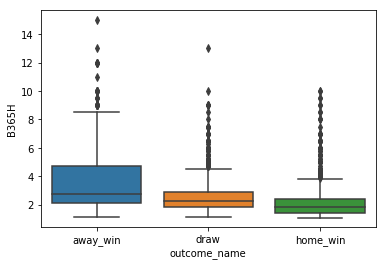

In [117]:
sns.boxplot(x='outcome_name', y='B365H', data=prem_league, order = ['away_win', 'draw', 'home_win'])

### Adding odds as an additional piece of information

It does look like the bookies are onto something, they offer lower odds, on average, when the home team ends up winning!  But how much emphasis should we give the bookmakers' predictions?  Let's ask Bayes!

Assume that Manchester United have a 63% chance of winning any particular game. A bookie comes to you and offers you odds of 1.5:1 of United winning the next game.  Doing a quick mental calculation, we transalte this to mean thte bookies predict a Manchester United win with 60% probability, so this is clearly the most likely of the three possible outcomes in the bookies' minds.  You do further research to discover that this bookie has got a 52% hit rate of picking the match outcome.  How much does this influence your decision on the match results?

* Let A be the chance of Manchester United winning the next game
* Let B that the Bookie picks that United will win the next game

In [118]:
P_A = 0.63                # prior probability that manchester wins the game
P_B_A = 0.52              # probability that the bookie picks a winner correctly

#  the probability that the bookie is right about calling the game is a combination of:
## if he picked correctly picked a winner times the chance of them winning, plus
## the chance he is wrong about picking the winner and they lose
P_B = P_B_A * P_A + (1 - P_B_A) * (1 - P_A) 

P_A_B = P_B_A * P_A / P_B
print("The probability of a Manchester United victory increases from {:0.2f} to {:0.2f}.".format(P_A, P_A_B))


The probability of a Manchester United victory increases from 0.63 to 0.65.


If you play around with the "accuracy" of the bookie you will get an estimate of how it affects the estimated probability.

In [119]:
def p_a_b(p_a, p_b_a):
    p_b = p_b_a * p_a + (1 - p_b_a) * (1 - p_a)
    return p_b_a * p_a /p_b 

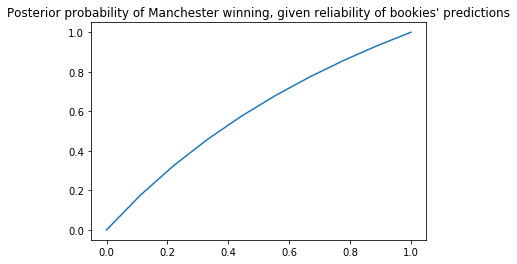

In [120]:
bookie_right = np.linspace(0, 1, 10)
new_odds = p_a_b(0.63, bookie_right)
plt.plot(bookie_right, new_odds)
plt.title("Posterior probability of Manchester winning, given reliability of bookies' predictions")

Of course, we're assuming that the predicted winner is the only piece of new information conveyed by the odds. There may perhaps be more, but we'll leave that to you to think about.

### Actually calculating these odds from the data

Now that we know how to update our prior beliefs given new data, we will show you how to actually extract this information from the dataset.

In [127]:
prem_league['prob_home_win'] = 1 / prem_league['B365H']
prem_league['prob_away_win'] = 1 / prem_league['B365A']
prem_league['prob_draw'] = 1 / prem_league['B365D']
prem_league['prob'] = prem_league[['prob_home_win', 'prob_away_win', 'prob_draw']].sum(axis=1)

In [128]:
prem_league[['prob_home_win', 'prob_away_win', 'prob_draw', 'prob']].describe()

,prob_home_win,prob_away_win,prob_draw,prob
count,3040.000000,3040.000000,3040.000000,3040.000000
mean,0.470861,0.307094,0.264322,1.042276
std,0.193458,0.170579,0.046578,0.014981
min,0.066667,0.034483,0.090909,1.017025
25%,0.333333,0.181818,0.238095,1.025770
50%,0.454545,0.285714,0.277778,1.050549
75%,0.598802,0.400000,0.303030,1.055556
max,0.909091,0.819672,0.333333,1.097706


Notice how the the `prob` column is always greater than 1.  This is how the "house" always wins... they have allocated a probability to all three outcomes greater than one.  They are overstating the true odds, which means they will collect the implied margin over the long run. If we assume that the same margin is applied to each possible outcome, then we can back out implied probabilities (that sum to one) from the odds.

In [129]:
prem_league['prob_home_win'] = prem_league['prob_home_win']/prem_league['prob']
prem_league['prob_away_win'] = prem_league['prob_away_win']/prem_league['prob']
prem_league['prob_draw'] = prem_league['prob_draw']/prem_league['prob']

In [130]:
prem_league[['home_win', 'prob_home_win']].mean()

home_win         0.457237
prob_home_win    0.451706
dtype: float64

In [131]:
#check that probabilities now sum to 1
prem_league[['prob_home_win','prob_away_win','prob_draw']].sum(axis=1).head()

id
1729    1.0
1730    1.0
1771    1.0
1731    1.0
1732    1.0
dtype: float64

In [132]:
prem_league[['away_win', 'prob_away_win']].mean()

away_win         0.285197
prob_away_win    0.294696
dtype: float64

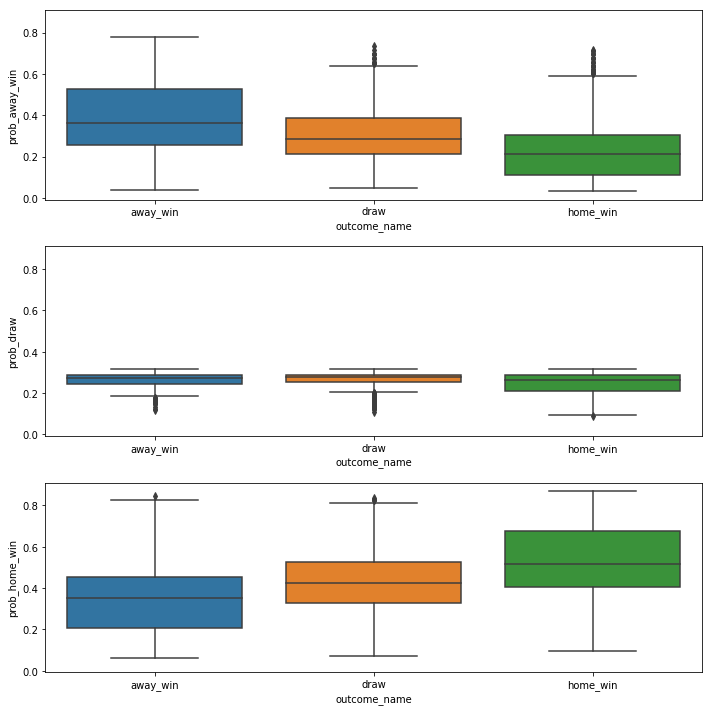

In [133]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10), sharey=True)
for i, prob in enumerate(['prob_away_win', 'prob_draw', 'prob_home_win']):
    sns.boxplot(x='outcome_name', y=prob, data=prem_league, ax=ax[i], order=['away_win', 'draw', 'home_win'])
plt.tight_layout()

We need to get the an estimate for the prediction of the bookmaker.  I will introduce the concept of `certainty` which gives a measure of how certain he we will call the game with an outright winner.  A `certainty` score of 100% means he is 100% certain of a "home win", while a score of -100% means he is certain of an "away win". A score close to zero means that it is too close to call an outright winner. 

In the chart below, we can see that there is uncertainty, but we must still create cutoff for a single prediction. Overall, there seem to be more blue dots in the top left corner (high away probability and low home probability of win). In contrast, the bottom right is `more red`.  

In the machine learning literature a lot of predictions are based on the highest probability outcome.  In this case we will set thresholds for the certainty because these two predictions work together to get a better understanding of the actual prediction.

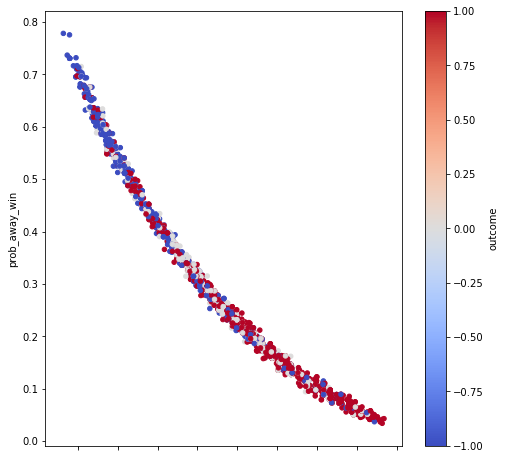

In [134]:
prem_league.plot(x='prob_home_win', y='prob_away_win', 
                 kind='scatter', c='outcome', 
                 colormap='coolwarm', figsize=(8, 8))

In [135]:
prem_league['certainty'] = prem_league['prob_home_win'] - prem_league['prob_away_win']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112b9abe0>,
      dtype=object)

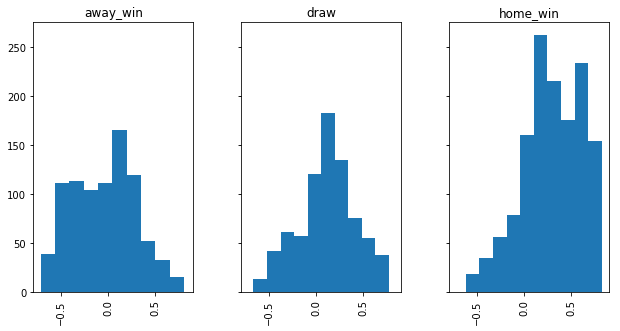

In [136]:
prem_league.hist(column='certainty', by='outcome_name', sharey=True, layout=(1, 3), sharex=True, figsize=(10, 5))

In [137]:
def bookie(certainty, home, away):
    if certainty > home:
        return 'home_win'
    if certainty < away:
        return 'away_win'
    else:
        return 'draw'    

In [138]:
prem_league['bookie'] = prem_league.apply(lambda x: bookie(x['certainty'], 0.15, -0.15),axis=1)

In [139]:
prem_league['bookie_right'] = (prem_league['bookie'] == prem_league['outcome_name']).astype('int')

In [140]:
prem_league[['bookie', 'outcome_name', 'bookie_right']].head()

,bookie,outcome_name,bookie_right
id,,,
1729,home_win,draw,0
1730,home_win,home_win,1
1771,draw,draw,1
1731,away_win,away_win,1
1732,home_win,home_win,1


In [141]:
prem_league['bookie_right'].mean()

0.5148026315789473

This provides us with a good sense check... the bookie doesn't have to be right everytime! He is right, on average, slightly better than tossing a coin. And when it lands in his favour, he makes a profit.

In [142]:
prem_league.pivot_table(values='bookie_right', columns='outcome_name', index='bookie', aggfunc='count')

outcome_name,away_win,draw,home_win
bookie,,,
away_win,332,148,127
draw,262,260,290
home_win,273,375,973


In [143]:
prem_league.groupby('outcome_name')['bookie_right'].mean()

outcome_name
away_win    0.382930
draw        0.332056
home_win    0.700000
Name: bookie_right, dtype: float64

To interpret this, the bookie is correct in predicting home winners 70% of the time under this certainty metric.  

As a further exercise, how else could you model the relationship between the bookies' odds and the actual outcome?

# Further Reading
Other great resources for more on Bayes Theorem:
1. [Simple Explanation using Legos](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego) 
2. [Wikipedia](http://en.wikipedia.org/wiki/Bayes%27_theorem) 
3. [Stat Trek](http://stattrek.com/probability/bayes-theorem.aspx)